In [1]:
# Import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# Buisness: Based on given feature of dataset we need to predict wheather the asteroid is harmful or not.

## Task: Binary Classification Task
## Target Veriable: Hazardous
## Data collection: Data is collected from kaggle to create simple NN.

In [8]:
# Step:1 Loading data
data = pd.read_csv("neo.csv")

In [3]:
# Basic checks
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
data.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [ ]:
data.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

* In this data total 10 features is present including 2 unique and 1 target feature.

In [ ]:
data.shape

(90836, 10)

* Toatl 90836 observation with 10 feature

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


* In this data total 4 data type is avialable

In [ ]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


* No constant column is available

In [ ]:
data.describe(include="O")

,name,orbiting_body
count,90836,90836
unique,27423,1
top,469219 Kamo`oalewa (2016 HO3),Earth
freq,43,90836


* One constant column are present so we need to drop this column

## Domain Analysis

1. Id: Unique Identifier for each asteroid.
2. Name: Name of asteroid given by NASA
3. est_diameter_min: Minimum Estimated Diameter in Kilometres
4. est_diameter_max: Maximum Estimated Diameter in Kilometres
5. relative_velocity: Velocity Relative to Earth
6. orbiting_body: Planet that the asteroid orbits
7. miss_distance: Distance in Kilometres missed
8. sentry_object: Included in sentry-an automated collision monitoring system
9. Absulute_magnitutde: Describes intrinsic luminosity
10. Hazardous: Boolean feature that shows whether asteroid is harmful or not

## Data Preprocessing & Feature Enginnering

In [4]:
# Step:1 Checking missing value
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

* No missing value in this data

In [9]:
data.hazardous.unique()

array([1, 2, 0])

In [8]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [3]:
data.hazardous.unique()

array(['False', 'True', 'Fal'], dtype=object)

In [6]:
data.loc[data['hazardous']=='Fal']

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
50171,3788092,(2017 UT7),0.030518,0.06824,30533.152092,1.105328e+07,Earth,False,24.7,Fal


In [9]:
# Dropping one row because of in target column one observation is contain unique label
data = data.drop(50171)

In [10]:
# Step:2 Handling Categorical data with the help of label encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.hazardous = label.fit_transform(data.hazardous)

## Feature Enginnering

In [11]:
# Dropping unique and constant column
data.drop(['id','name','orbiting_body','sentry_object'],axis=1,inplace=True)

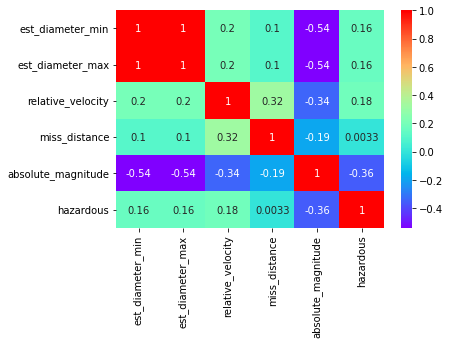

In [23]:
# Checking the correlation
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

In [12]:
# Dropping the highly correlated feature
data.drop('est_diameter_min',axis=1,inplace=True)

In [13]:
# Checking the duplicates
data.duplicated().sum()

7

In [14]:
# Dropping duplicates
data.drop_duplicates()
data.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.594347,73588.726663,6.143813e+07,20.00,1
2,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.570217,42737.733765,4.627557e+07,20.09,1


## Define Independant & Dependant veriable

In [15]:
X = data.iloc[:,:-1]
y = data.hazardous

In [16]:
X.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,2.679415,13569.249224,5.483974e+07,16.73
1,0.594347,73588.726663,6.143813e+07,20.00
2,1.614507,114258.692129,4.979872e+07,17.83
3,0.215794,24764.303138,2.543497e+07,22.20
4,0.570217,42737.733765,4.627557e+07,20.09


In [17]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: hazardous, dtype: int64

## Split Training & Testing Data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20)

In [19]:
X_train.shape

(68126, 4)

In [20]:
X_test.shape

(22709, 4)

## Scaling 

In [21]:
# Scale the feature using satandard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Creation & Import Library

In [22]:
# Get the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [24]:
# Object creation of model
model = Sequential()

In [25]:
X_train.shape

(68126, 4)

In [53]:
# Adding input to the first hidden layer
model.add(Dense(units=4,input_dim=4,activation='relu',kernel_initializer='he_uniform'))

# Adding first hidden layer to second hidden layer
model.add(Dense(units=16,activation='relu',kernel_initializer='he_uniform'))

# Adding second hidden layer to third hidden layer
model.add(Dense(units=12,activation='relu',kernel_initializer='he_uniform'))

# Adding third hidden layer to fourth hidden layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))

# Adding fourth hidden layer to fifth hidden layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))



In [54]:
# Compile the keras model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
# Fit the keras model to the dataset
model_history = model.fit(X_train,y_train,epochs=15,validation_split=0.33,batch_size=10)

Epoch 1/15
4565/4565 [==============================] - 16s 3ms/step - loss: 0.2037 - accuracy: 0.9088 - val_loss: 0.1884 - val_accuracy: 0.9110
Epoch 2/15
4565/4565 [==============================] - 15s 3ms/step - loss: 0.1891 - accuracy: 0.9102 - val_loss: 0.1859 - val_accuracy: 0.9128
Epoch 3/15
4565/4565 [==============================] - 12s 3ms/step - loss: 0.1883 - accuracy: 0.9109 - val_loss: 0.1869 - val_accuracy: 0.9113
Epoch 4/15
4565/4565 [==============================] - 13s 3ms/step - loss: 0.1884 - accuracy: 0.9107 - val_loss: 0.1848 - val_accuracy: 0.9118
Epoch 5/15
4565/4565 [==============================] - 13s 3ms/step - loss: 0.1880 - accuracy: 0.9106 - val_loss: 0.1870 - val_accuracy: 0.9130
Epoch 6/15
4565/4565 [==============================] - 15s 3ms/step - loss: 0.1881 - accuracy: 0.9100 - val_loss: 0.1838 - val_accuracy: 0.9129
Epoch 7/15
4565/4565 [==============================] - 15s 3ms/step - loss: 0.1881 - accuracy: 0.9102 - val_loss: 0.1827 - val_ac

## Evaluation

In [56]:
# Model evaluation
accuracy = model.evaluate(X_test,y_test)
print(accuracy)

710/710 [==============================] - 1s 2ms/step - loss: 0.1801 - accuracy: 0.9144
[0.1801481992006302, 0.9143511652946472]


In [57]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


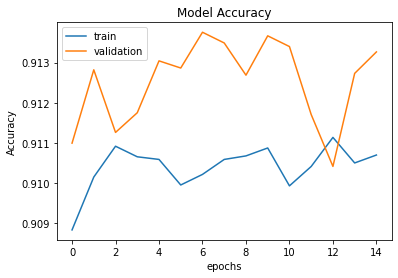

In [58]:
# Summerize history of accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

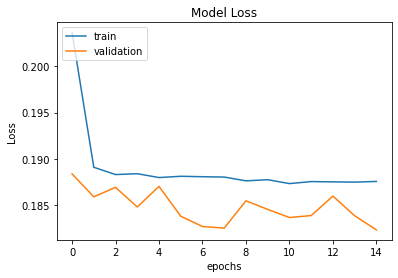

In [59]:
# Summerize history of loss
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [60]:
# Making the prediction and evaluate the model
# Predictiong the test result
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Threshold for binary classification

In [61]:
# getting the confusion metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
cm

array([[20385,  1799],
       [  146,   379]])

In [62]:
result = accuracy_score(y_pred,y_test)
result

0.9143511383152054